In [1]:
!pip install pandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install uncertainties

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 6.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import *

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!ls gdrive/MyDrive/

 1ext.pdb				       private
 20210723_181116.jpg			       PyRosetta
 All_input_structures.sdf		       R69.gmap
 All_proteins_total.sdf			      'Referat fra ILT møde 7.docx'
'Calculation of MW P47_Exp1-2_compiled.xlsx'   sample
 Chromod				       sample2
'ChroMod meeting 03-09-16.pptx'		       sample2.pdf
'Colab Notebooks'			       sample.pdf
 Klampenborgturen.gmap			      'sommertur 2019.gmap'
'MAXIVLIFE_EOI NNF v6 2015 07 06.pdf'	       tree
 misc					       tree.pdf
 NFB_TICKET_vista_WXHTHZR_1.pdf		      'Untitled map.gmap'


In [7]:
#read data from excel as dictionary of dataframes
dict_df = pd.read_excel('gdrive/MyDrive/Calculation of MW P47_Exp1-2_compiled.xlsx', sheet_name=None) # sheet_name=None gives a dictonary of dataframes with all sheets

In [8]:
for sheet in dict_df.keys():
    print(sheet)

Column calibration and peak ana
Standards
Sample 1.1
Sample 1.2
Sample 1.3
p47phox 280 uM
p47phox 140 uM
p47phox 14 uM
Sample 3
Sample 2.2 2nd run
Sample 2.3 2nd run
Sample 2.4A
Sample 2.4A SEC-SEC
Sample 2.4 A fraction A12 conc
p47phox 3 uM
Sample 2.5A fraction C7 SEC-SEC
p47phox 1 uM
p47phox .3 uM
Sample 2.4B
Sample 2.4B fraction A10 SEC-SE
Sample 2.5B
Sample 2.6B
Sample 2.7B


In [9]:
selected_dict_df = {} # new dictionary with only selected spectra
items = ['Standards','p47phox 280 uM', 'p47phox 140 uM','p47phox 14 uM','p47phox 3 uM','p47phox 1 uM','p47phox .3 uM']
for item in items:
    selected_dict_df[item] = dict_df[item]

In [10]:
#print selected datasets
for sheet in selected_dict_df.keys():
    print(sheet)

Standards
p47phox 280 uM
p47phox 140 uM
p47phox 14 uM
p47phox 3 uM
p47phox 1 uM
p47phox .3 uM


In [11]:
#print example raw data
print(selected_dict_df.get('p47phox 280 uM'))

      Time (min)  Elution volume [ml]       254  280 nm absorbance [mAu]
0       0.002500             0.000500  0.009537                 0.058651
1       0.005833             0.001167 -0.006676                 0.044346
2       0.009167             0.001833 -0.016212                 0.029087
3       0.012500             0.002500 -0.017643                 0.017166
4       0.015833             0.003167 -0.009537                 0.008106
...          ...                  ...       ...                      ...
7495   24.985833             4.997167  0.090599                 0.170231
7496   24.989167             4.997833  0.074863                 0.165462
7497   24.992500             4.998500  0.055313                 0.157833
7498   24.995833             4.999167  0.038147                 0.149727
7499   24.999167             4.999833  0.024796                 0.142574

[7500 rows x 4 columns]


In [12]:
# select example dataframe
sample = dict_df.get('p47phox .3 uM')

In [13]:
sample

,Elution volume [ml],280 nm absorbance [mAu],ml,mS/cm,ml.1,%B,ml.2,Injection,ml.3,Logbook,ml.4,Fraction,ml.5,mAU
0,-0.015889,0.000000,-0.015889,15.416426,-0.015889,0.0,0.000092,NaN,-0.015889,Method Settings,-0.013609,"1,D,4",0.000000,-0.12202
1,-0.015639,0.033506,-0.015389,15.417078,-0.013391,0.0,NaN,NaN,-0.015441,Sample Application,0.186563,"1,D,3",0.000250,-0.12202
2,-0.015389,0.035169,-0.014890,15.417138,-0.010893,0.0,NaN,NaN,0.056321,Elution,0.386596,"1,D,2",0.000499,-0.12202
3,-0.015140,0.034364,-0.014391,15.417167,-0.008395,0.0,NaN,NaN,NaN,NaN,0.586655,"1,D,1",0.000749,-0.12202
4,-0.014890,0.034504,-0.013891,15.417177,-0.005897,0.0,NaN,NaN,NaN,NaN,0.786657,"1,E,1",0.000999,-0.12202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,4.542140,-0.113480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18255,4.542389,-0.116340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18256,4.542639,-0.113358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18257,4.542889,-0.115346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# print columns in example
for col in sample.columns:
    print(col)

Elution volume [ml]
280 nm absorbance [mAu]
ml
mS/cm
ml.1
%B
ml.2
Injection
ml.3
Logbook
ml.4
Fraction
ml.5
mAU


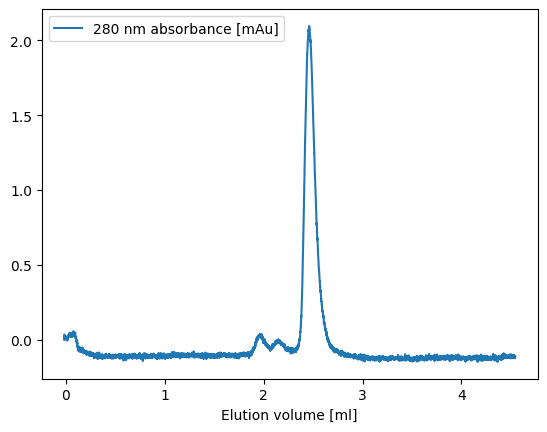

In [15]:
# example plot
sample.plot(x='Elution volume [ml]', y='280 nm absorbance [mAu]', kind='line')
plt.show()

In [16]:
def simpson_integration_discrete(x, y):
    """
    Approximates the definite integral of the discrete set of points (x_i, y_i) using Simpson's rule.

    :param x: a list of x-coordinates
    :param y: a list of y-coordinates
    :return: the approximate value of the definite integral of the discrete set of points (x_i, y_i)
    """
    n = len(x) - 1
    if n < 1:
        raise ValueError("List of points must have at least two elements.")

    if n % 2 == 0:  # even number of intervals
        h = (x[-1] - x[0]) / n
        odd_sum = 0
        even_sum = 0
        for i in range(1, n, 2):
            odd_sum += y[i]
        for i in range(2, n-1, 2):
            even_sum += y[i]
        integral = (h / 3) * (y[0] + 4 * odd_sum + 2 * even_sum + y[-1])

    else:  # odd number of intervals
        h1 = (x[-2] - x[0]) / (n-2)
        h2 = (x[-1] - x[-2])
        odd_sum = 0
        even_sum = 0
        for i in range(1, n-2, 2):
            odd_sum += y[i]
        for i in range(2, n-2, 2):
            even_sum += y[i]
        integral = (h1 / 3) * (y[0] + 4 * odd_sum + 2 * even_sum + y[-2]) \
                   + (h2 / 3) * (y[-2] + 4 * y[-2] + y[-1])

    return integral


Standards
84.31+/-0.22
23.62+/-0.13
186.91+/-0.33
18.37+/-0.10
45.98+/-0.16
0.095+/-0.007
1.837+/-0.032
0.176+/-0.010


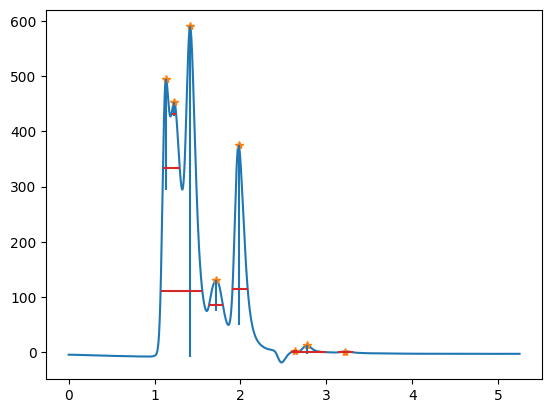

p47phox 280 uM
129.10+/-0.32
28.12+/-0.15
0.880+/-0.026


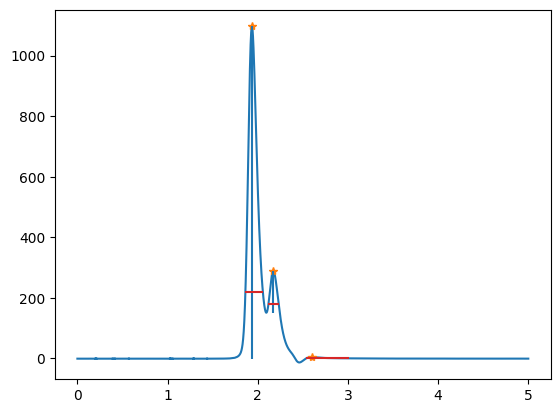

p47phox 140 uM
67.25+/-0.23
14.74+/-0.11
0.708+/-0.023


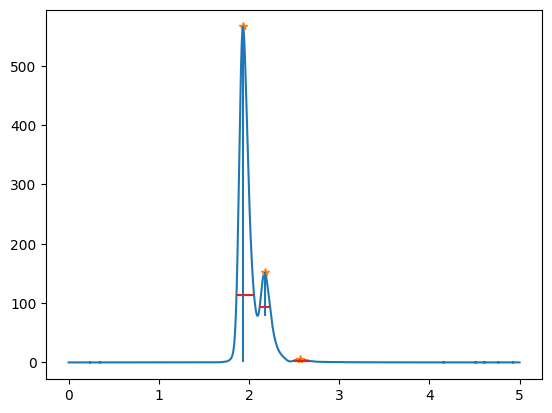

p47phox 14 uM
5.73+/-0.07
1.257+/-0.031
1.688+/-0.035


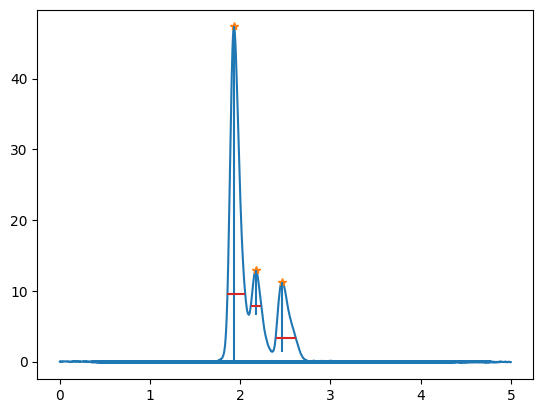

p47phox 3 uM
0.065+/-0.004
0.178+/-0.007
0.058+/-0.004
0.762+/-0.014


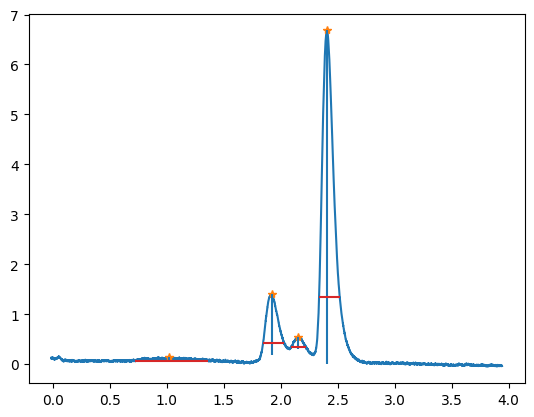

p47phox 1 uM
0.0041+/-0.0010
0.0008+/-0.0005
0.099+/-0.005
0.0460+/-0.0034
0.0245+/-0.0025
0.780+/-0.014


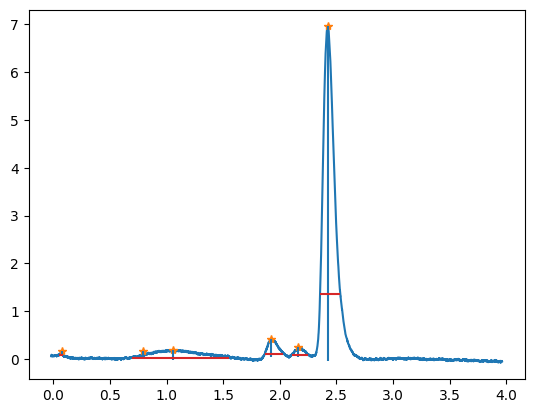

p47phox .3 uM
0.0181+/-0.0022
0.0129+/-0.0019
0.259+/-0.008


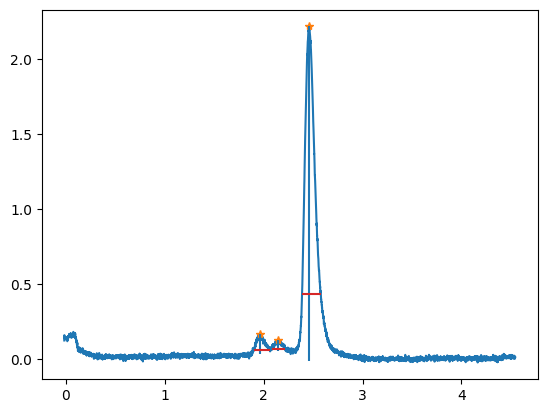

In [17]:
# create list of dictionaries with results from all chromatograms

import uncertainties as unc  
import uncertainties.unumpy as unumpy  


row_list = [] # list for results dictionaries

# loop through datasets

for key,value in selected_dict_df.items():
    
    sample = value

    x = sample['Elution volume [ml]'].to_numpy()
    y = sample['280 nm absorbance [mAu]'].to_numpy()

    # adjust baseline to average of 3-4 ml elution region
    
    base_start = np.where(x > 3. )[0][0]
    base_stop = np.where(x > 3.5 )[0][0]
    
    y = y-np.mean(y[base_start:base_stop])

    #adjust prominence for weak peaks not to find too many
    if (np.nanmax(y) > 10):
        prominence=.5
    else:
        prominence=.07


    # find peaks 
    peaks_ml = []
    sp, _ = signal.find_peaks(y, prominence=prominence)
    promin = signal.peak_prominences(y, sp)[0]
    h = y[sp] - promin
    print(key)
    for i,obj in enumerate(sp):
        peak_ml = x[obj]
        #print('Elution volume', i ,':', x[obj], 'ml')
        peaks_ml.append(peak_ml)

    # find peak borders
    results_borders = signal.peak_widths(y, sp, rel_height=.8)
    peaks_widths = results_borders[0] # ndarray with peak widths in array index values
    peaks_widths_height = results_borders[1] # ndarray with y values of peak width in array index values

    peaks_start = x[results_borders[2].astype(int)] # ndarray with all peak start in ml for plt
    peaks_stop = x[results_borders[3].astype(int)]  # ndarray with all peak stop  in ml for plt

    # integrate peaks

    borders= np.vstack((results_borders[2], results_borders[3])).T # slice peak_widths output for peak start/stop arrays and transpose

    peak_areas = []
    peak_areas_unc = []
    for i,obj in enumerate(borders):
        start = int(obj[0])
        end = int(obj[1])

        #area = integrate.simpson(y[start:end], x[start:end])
        #include uncertainties for error propagation constant for x and sqrt pf counts for y
        # example: http://astropython.blogspot.com/2012/04/how-to-easily-do-error-propagation-on.html
        n = len(x[start:end])
        err_x = np.empty(n)
        for i in range(n):
          err_x[i] = .0001
        err_y = np.sqrt(y[start:end])

        # store x and y with uncertainties and values 

        x_unc = unumpy.uarray( x[start:end], err_x ) 
        y_unc = unumpy.uarray( y[start:end], err_y ) 

        # calculate area using Simpsons formula
        area = simpson_integration_discrete( x_unc,y_unc)
        print(area)
        #print('Peak area', i, ':', integrate.simpson(y[start:end], x[start:end]), 'mAbs*ml')
        peak_areas.append(area.n)
        peak_areas_unc.append(area.std_dev)

    for i,obj in enumerate(peaks_ml):
        data = {'Sample': key, 'Peak elution volume': peaks_ml[i], 'Peak area': peak_areas[i], 'Peak area std': peak_areas_unc[i]}


        row_list.append(data)

    #plot chromatograms

    plt.plot(x,y)
    plt.plot(x[sp], y[sp], "*")
    plt.vlines(x=x[sp], ymin=h, ymax=y[sp])
    plt.hlines(peaks_widths_height,peaks_start,peaks_stop, color="C3")
    plt.show()

df = pd.DataFrame(row_list) # create dataframe from list of results dictionaries

In [18]:
df #dataframe with peaks data

,Sample,Peak elution volume,Peak area,Peak area std
0,Standards,1.134375,84.313774,0.224945
1,Standards,1.228875,23.619165,0.130651
2,Standards,1.414375,186.910575,0.325945
3,Standards,1.718875,18.366886,0.102287
4,Standards,1.978375,45.981690,0.163976
5,Standards,2.631875,0.095082,0.007362
6,Standards,2.771875,1.837234,0.031954
7,Standards,3.221875,0.175549,0.009895
8,p47phox 280 uM,1.935833,129.099264,0.323304
9,p47phox 280 uM,2.172500,28.123231,0.152045


In [19]:
#Move standards to seperate dataframe
cond = df['Sample'] == 'Standards'
df_standards = df.loc[cond, :]

#drop peaks corresponding to standard proteins
df_standards= df_standards.drop(df_standards.index[[1,5,6,7]])
df_standards.round(decimals=2)

,Sample,Peak elution volume,Peak area,Peak area std
0,Standards,1.13,84.31,0.22
2,Standards,1.41,186.91,0.33
3,Standards,1.72,18.37,0.10
4,Standards,1.98,45.98,0.16


In [20]:
# add info to standards dataframe 

proteins = ['Thyroglobolin', 'Ferritin', 'Aldolase', 'Ovalbumin']
Mws = [660000, 474000, 158000, 43000]
Rgs = [0, 0, 4.8, 2.8]
df_standards['proteins'] = proteins
df_standards['Molar weigths'] = Mws
df_standards['Radius of Gyration'] = Rgs
df_standards

,Sample,Peak elution volume,Peak area,Peak area std,proteins,Molar weigths,Radius of Gyration
0,Standards,1.134375,84.313774,0.224945,Thyroglobolin,660000,0.0
2,Standards,1.414375,186.910575,0.325945,Ferritin,474000,0.0
3,Standards,1.718875,18.366886,0.102287,Aldolase,158000,4.8
4,Standards,1.978375,45.981690,0.163976,Ovalbumin,43000,2.8


Slope and intercept: [-0.14390785  2.04751613]


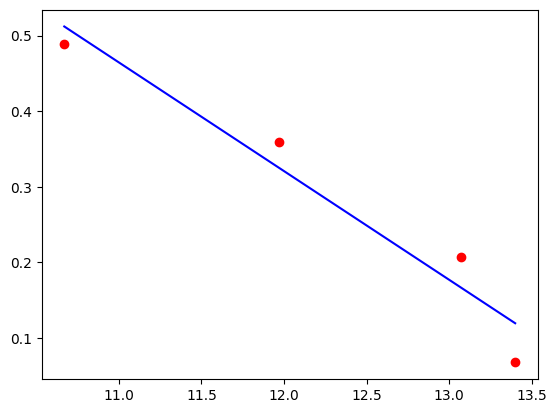

Slope and intercept Rg: [-0.24072512  0.73704276]


/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


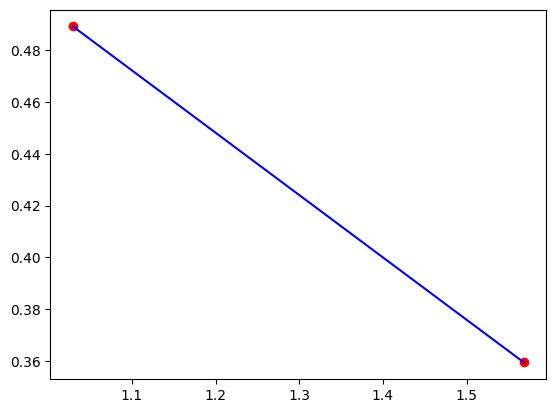

,Sample,Peak elution volume,Peak area,Peak area std,proteins,Molar weigths,Radius of Gyration,K average
0,Standards,1.134375,84.313774,0.224945,Thyroglobolin,660000,0.0,0.067187
2,Standards,1.414375,186.910575,0.325945,Ferritin,474000,0.0,0.207188
3,Standards,1.718875,18.366886,0.102287,Aldolase,158000,4.8,0.359438
4,Standards,1.978375,45.981690,0.163976,Ovalbumin,43000,2.8,0.489188


In [21]:
# least squares fit of Kav=a*lnMW+b where Kav=(Vret-Vo)/(Vcol-Vo) determine intercept and slope
import numpy as np
from scipy.sparse import rand
from scipy.optimize import curve_fit

V0 = 1 #Superdex 200 5/150 increase void volume
Vcol = 3 #Superdex 200 5/150 increase total volume
Kavs =[]
for i in df_standards['Peak elution volume']:
    Kav = (i-V0)/(Vcol-V0)
    Kavs.append(Kav)

df_standards['K average'] = Kavs



x = np.log(df_standards['Molar weigths'].to_numpy())
y = df_standards['K average'].to_numpy()

def func(x, a, b):
    y = a*x + b
    return y

alpha_MW = curve_fit(func, xdata = x, ydata = y)[0] # returns slope and intercept tupple
print('Slope and intercept:', alpha_MW)

plt.plot(x, y, 'ro', label='K Average observed')
plt.plot(x, func(x, *alpha_MW), 'b-', label='K average fit')
plt.show()

# repeat with Rgs instead of MWs

x = np.log(df_standards['Radius of Gyration'].to_numpy()[2:4])
y = df_standards['K average'].to_numpy()[2:4]

alpha_Rg = curve_fit(func, xdata = x, ydata = y)[0] # returns slope and intercept tupple
print('Slope and intercept Rg:', alpha_Rg)

plt.plot(x, y, 'ro', label='K Average observed')
plt.plot(x, func(x, *alpha_Rg), 'b-', label='K average fit')
plt.show()

df_standards

In [22]:
df = df.drop(df[df['Sample'] == 'Standards'].index)

df = df.drop(df[df['Peak elution volume'] < 1.7 ].index)
df = df.drop(df[df['Peak elution volume'] > 2.4].index)

df2 = df.groupby('Sample', sort = False) #group data on samples

lst = [df2.nth(0), df2.nth(1)] # make list with 1'st and 2'nd peaks respectively
df3 = pd.concat(lst, axis=1, ignore_index=True) #merge as columns into one dataframe 
df3

,0,1,2,3,4,5
Sample,,,,,,
p47phox 280 uM,1.935833,129.099264,0.323304,2.172500,28.123231,0.152045
p47phox 140 uM,1.933667,67.252712,0.228458,2.173000,14.744522,0.107737
p47phox 14 uM,1.930500,5.727875,0.065391,2.174500,1.257239,0.030544
p47phox 3 uM,1.919706,0.177928,0.006557,2.148654,0.057767,0.003736
p47phox 1 uM,1.924867,0.046014,0.003374,2.163072,0.024478,0.002464
p47phox .3 uM,1.963485,0.018067,0.002239,2.149012,0.012923,0.001893


In [23]:
#produce final dataframe with only peaks of interest


df = df.drop(df[df['Sample'] == 'Standards'].index)

df = df.drop(df[df['Peak elution volume'] < 1.7 ].index)
df = df.drop(df[df['Peak elution volume'] > 2.4].index)

df2 = df.groupby('Sample', sort = False) #group data on samples


lst = [df2.nth(0), df2.nth(1)] # make list with 1'st and 2'nd peaks respectively
df3 = pd.concat(lst, axis=1, ignore_index=True) #merge as columns into one dataframe 

#rename columns

df3.rename(columns={ df3.columns[0]: "Peak 1 [ml]" }, inplace = True)
df3.rename(columns={ df3.columns[3]: "Peak 2 [ml]"}, inplace = True)
df3.rename(columns={ df3.columns[1]: "Area 1 [ml*mAbs]"}, inplace = True)
df3.rename(columns={ df3.columns[2]: "Esd 1 [ml*mAbs]"}, inplace = True)
df3.rename(columns={ df3.columns[4]: "Area 2 [ml*mAbs]"}, inplace = True)
df3.rename(columns={ df3.columns[5]: "Esd 2 [ml*mAbs]"}, inplace = True)


# calculate peak ratios
df3['1/2 area'] = df3['Area 2 [ml*mAbs]'] / df3['Area 1 [ml*mAbs]']

# add MWs derived from column calibration

MW_samples =[]
for i in df3['Peak 1 [ml]']:
    Kav = (i-V0)/(Vcol-V0)
    MW_sample = int(np.exp((Kav- alpha_MW[1])/alpha_MW[0]))
    MW_samples.append(MW_sample)
    
df3['MW 1'] = MW_samples

MW_samples =[]
for i in df3['Peak 2 [ml]']:
    Kav = (i-V0)/(Vcol-V0)
    MW_sample = int(np.exp((Kav- alpha_MW[1])/alpha_MW[0]))
    MW_samples.append(MW_sample)
    
df3['MW 2'] = MW_samples

# add Rgs derived from column calibration

Rg_samples =[]

for i in df3['Peak 1 [ml]']:
    Kav = (i-V0)/(Vcol-V0)
    Rg_sample = np.exp((Kav- alpha_Rg[1])/alpha_Rg[0])
    Rg_samples.append(Rg_sample)
    
df3['Rg 1'] = Rg_samples

Rg_samples =[]

for i in df3['Peak 2 [ml]']:
    Kav = (i-V0)/(Vcol-V0)
    Rg_sample = np.exp((Kav- alpha_Rg[1])/alpha_Rg[0])
    Rg_samples.append(Rg_sample)
    
df3['Rg 2'] = Rg_samples

#re-arragne columns
cols = ['Peak 1 [ml]', 'Area 1 [ml*mAbs]',"Esd 1 [ml*mAbs]", 'MW 1', 'Rg 1', 'Peak 2 [ml]', 'Area 2 [ml*mAbs]',"Esd 2 [ml*mAbs]", 'MW 2', 'Rg 2', '1/2 area']
df3 = df3[cols]


# save as excel
df3.style.set_precision(2).hide_index().to_excel('styled.xlsx', engine='openpyxl')

df3.round(decimals=3)

<ipython-input-23-6cd806896542>:72: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df3.style.set_precision(2).hide_index().to_excel('styled.xlsx', engine='openpyxl')
<ipython-input-23-6cd806896542>:72: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df3.style.set_precision(2).hide_index().to_excel('styled.xlsx', engine='openpyxl')


,Peak 1 [ml],Area 1 [ml*mAbs],Esd 1 [ml*mAbs],MW 1,Rg 1,Peak 2 [ml],Area 2 [ml*mAbs],Esd 2 [ml*mAbs],MW 2,Rg 2,1/2 area
Sample,,,,,,,,,,,
p47phox 280 uM,1.936,129.099,0.323,58481,3.059,2.173,28.123,0.152,25698,1.871,0.218
p47phox 140 uM,1.934,67.253,0.228,58923,3.072,2.173,14.745,0.108,25653,1.869,0.219
p47phox 14 uM,1.930,5.728,0.065,59575,3.093,2.174,1.257,0.031,25520,1.863,0.219
p47phox 3 uM,1.920,0.178,0.007,61851,3.163,2.149,0.058,0.004,27918,1.966,0.325
p47phox 1 uM,1.925,0.046,0.003,60752,3.129,2.163,0.024,0.002,26554,1.908,0.532
p47phox .3 uM,1.963,0.018,0.002,53124,2.888,2.149,0.013,0.002,27883,1.964,0.715


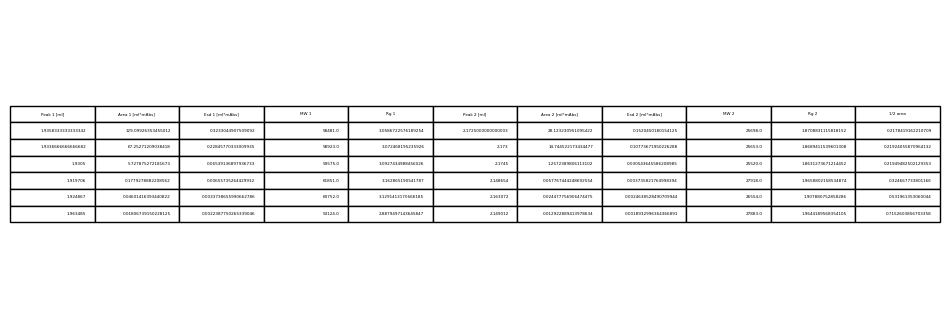

In [24]:
# dataframe to pdf 
from matplotlib.backends.backend_pdf import PdfPages

fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df3.values,colLabels=df3.columns,loc='center')
pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()


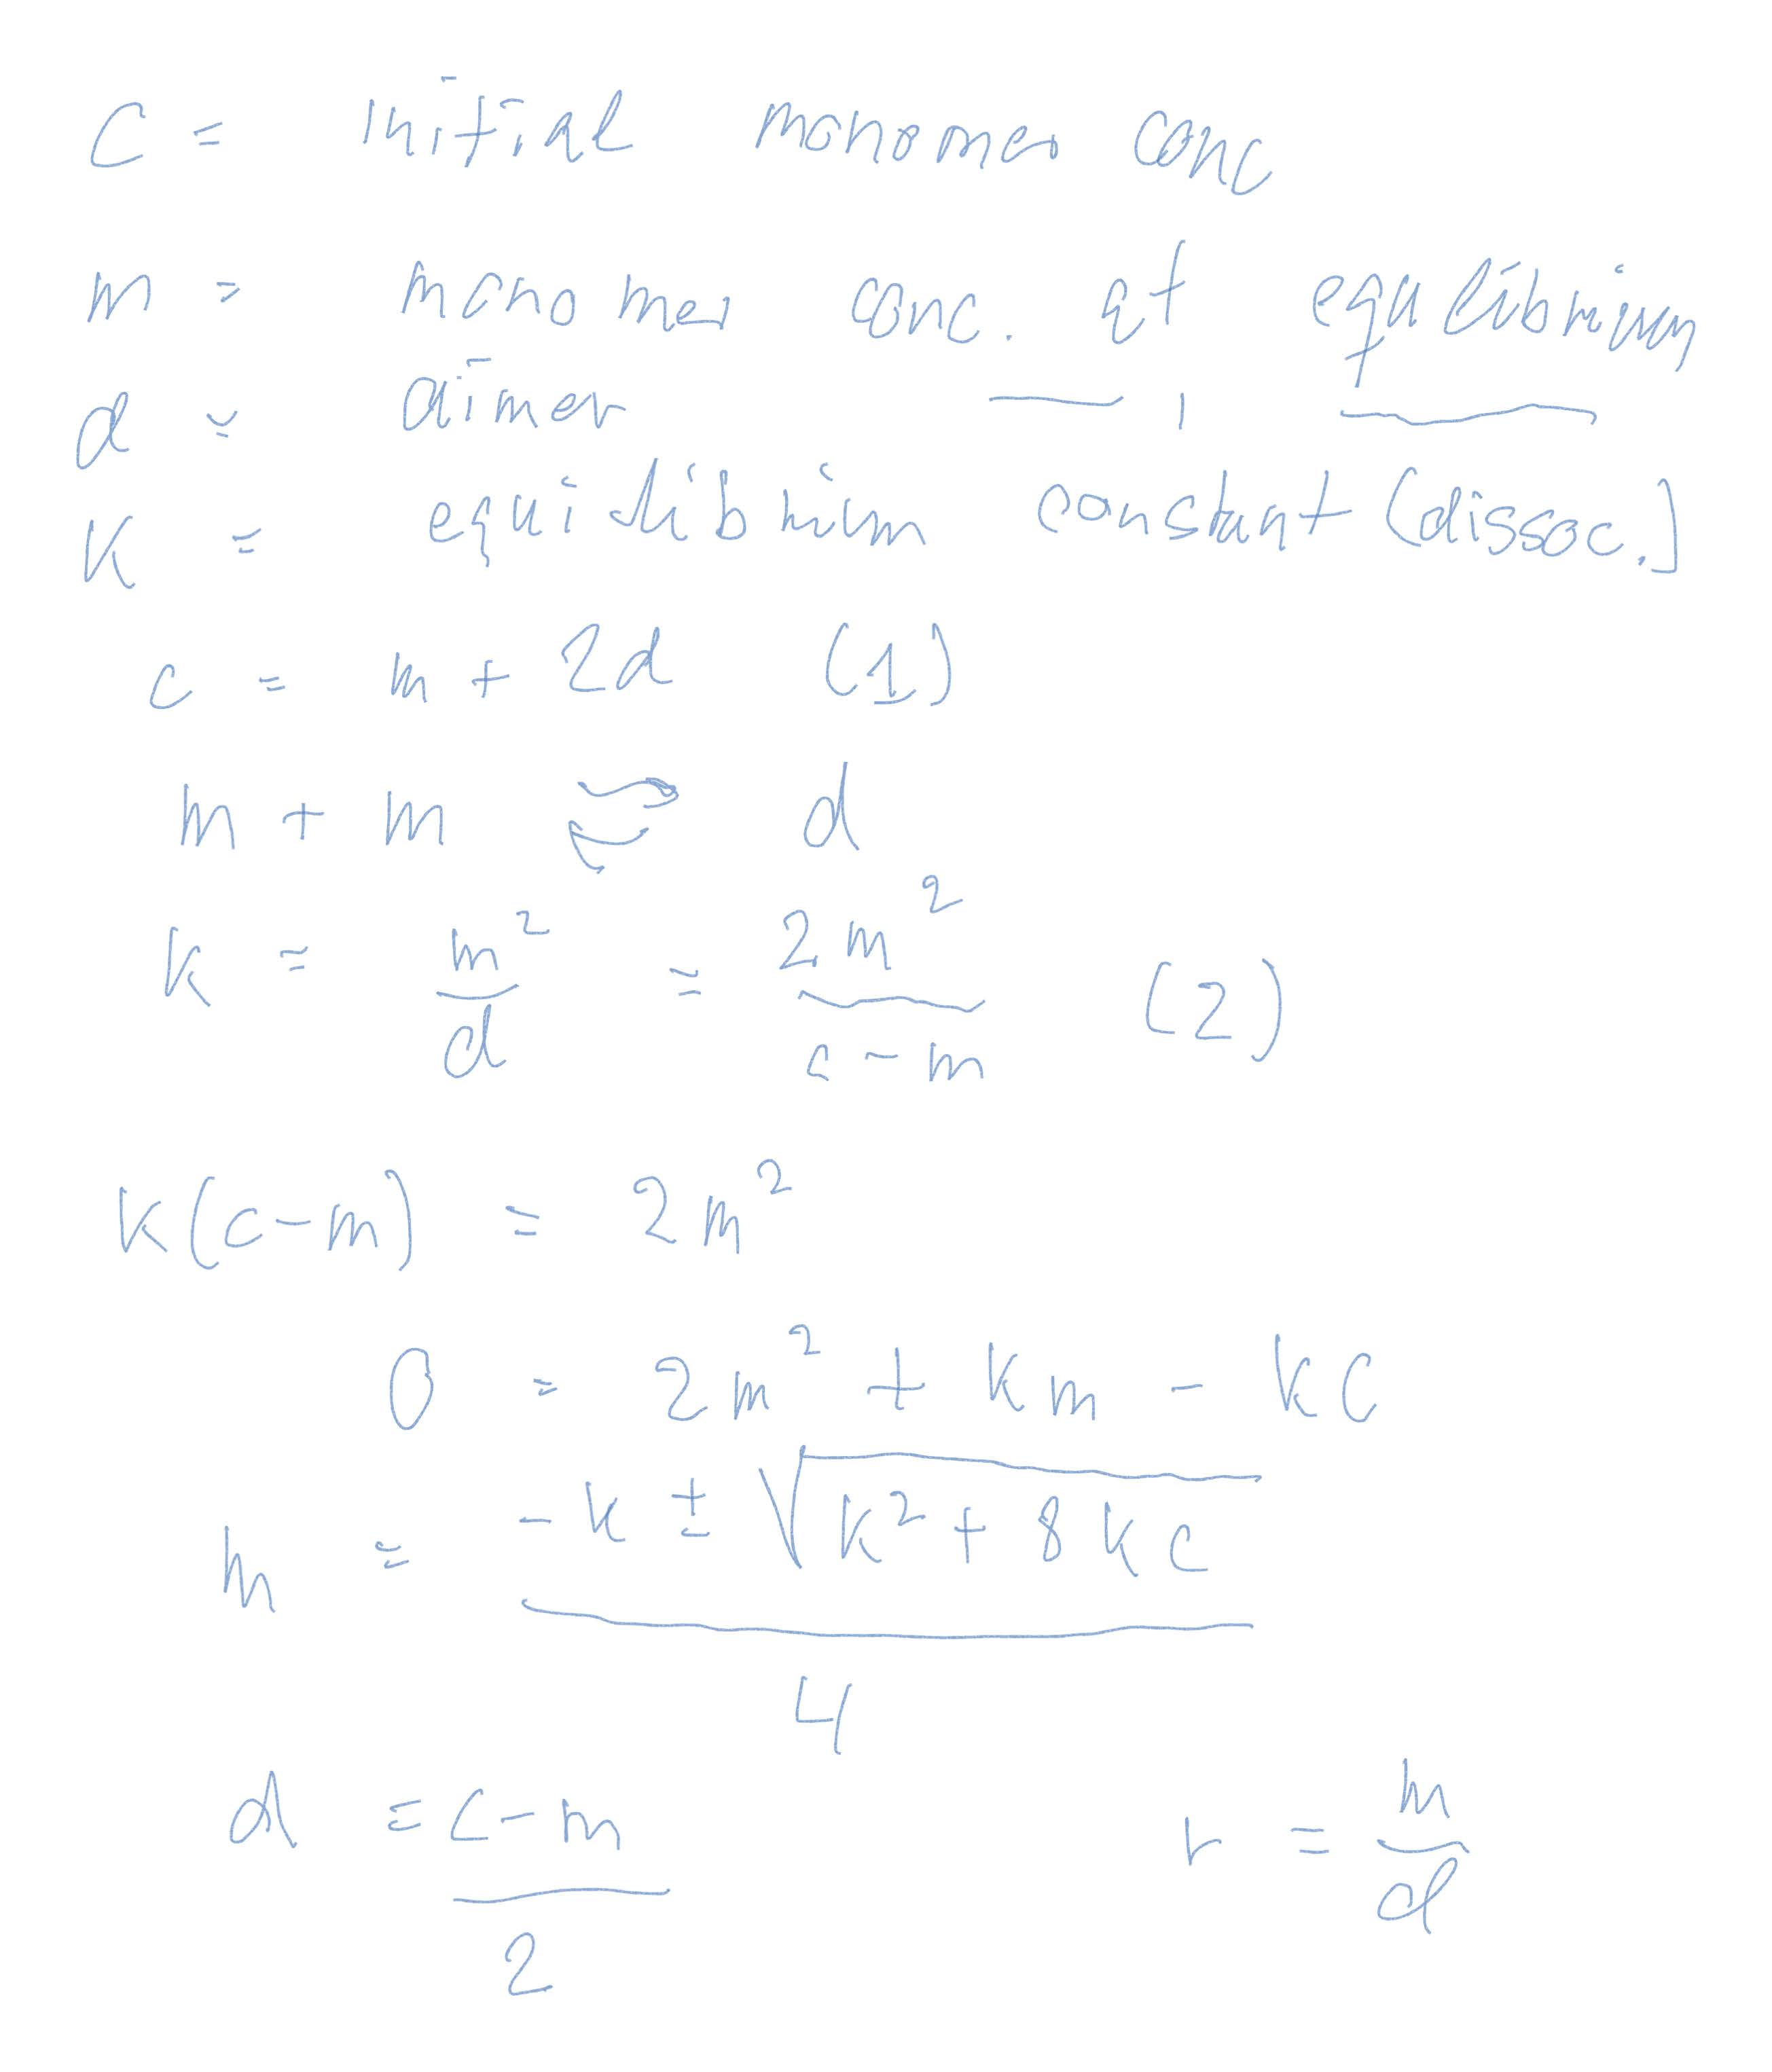

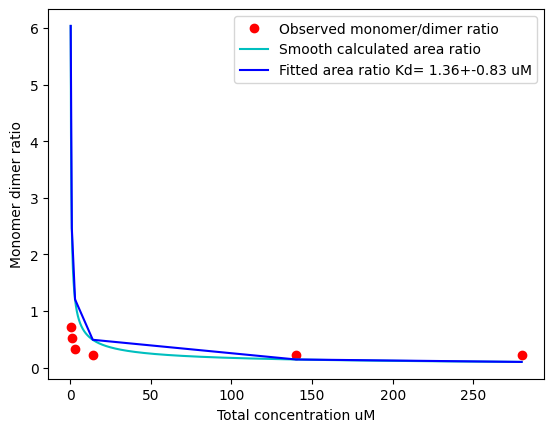

Kd = 1.3607045000078204 uM +-  [0.8338545]


In [25]:
#attempt to calculate Kd from data
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties as unc  
import uncertainties.unumpy as unumpy  


# Define the function to fit (monomer dimer ratio as a function of total concentration)
def monomer_dimer_ratio(ct, Kd):
  di = (Kd**2 + 8*ct*Kd)
  di = np.sqrt(di)
  m = (-Kd + di)/4
  d = (ct - m)/2 
  return m/d

x = np.array([280, 140, 14, 3, 1, .3])

# area data from table above
area_1 = df3['Area 1 [ml*mAbs]'].to_numpy()
area_2 = df3['Area 2 [ml*mAbs]'].to_numpy()


# error estimates from table above

err_1 = df3['Esd 1 [ml*mAbs]'].to_numpy()
err_2 = df3['Esd 2 [ml*mAbs]'].to_numpy()


# store area uncertainties with values 
area_1 = unumpy.uarray( area_1, err_1 ) 
area_2 = unumpy.uarray( area_2, err_2 ) 

# calculate ratio with error propagation
r = area_2/area_1

sigmas = np.empty(len(r))
r_values = np.empty(len(r))

# extract uncertainties
for i,o in enumerate(r):
  sigmas[i] = o.std_dev

# extract values
for i,o in enumerate(r):
  r_values[i] = o.n

#Generate x values for smooth curve
smooth_x = np.arange(.3, 280,.01)

# Fit the function to the data using curve_fit
popt, pcov = curve_fit(monomer_dimer_ratio, x, r_values, 1, sigma=sigmas)

# Plot the results
plt.plot(x, r_values, 'ro', label='Observed monomer/dimer ratio')
plt.plot(smooth_x, monomer_dimer_ratio(smooth_x, *popt), 'c-', label='Smooth calculated area ratio' )
plt.plot(x, monomer_dimer_ratio(x, *popt), 'b-', label='Fitted area ratio Kd= '+str(round(popt[0],2))+ '+-' +str(round(float(np.sqrt(np.diag(pcov))),2)) +' uM' )
plt.xlabel('Total concentration uM')
plt.ylabel('Monomer dimer ratio')
plt.legend()
plt.show()

# Print the fitted parameter value
print('Kd =', popt[0], 'uM', '+- ', str(np.sqrt(np.diag(pcov))))

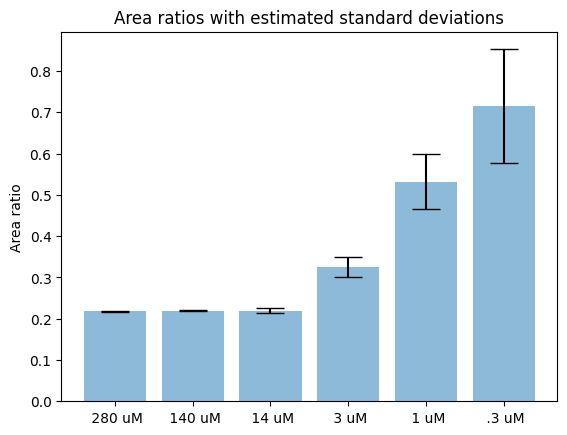

In [57]:
# Create a bar chart with error bars 

values = r_values
std = sigmas
cols = df3.index.values
fig, ax = plt.subplots()
ax.bar(range(n_values), values, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(range(n_values))
ax.set_xticklabels([cols[i].format(i+1)[7:] for i in range(n_values)])
ax.set_ylabel('Area ratio')
ax.set_title('Area ratios with estimated standard deviations')
plt.show()


In [63]:
# are the ratios significantly different? Calculate the differences in units of standard deviations  

import numpy as np
import pandas as pd

# create a numpy array representing values and standard deviations
values = r_values
std = sigmas

# calculate the differences between all pairs of values
differences = values[:, np.newaxis] - values

# calculate the standard deviation of the differences using the formula for
# the standard deviation of the sum/difference of two variables
std_differences = np.sqrt(std[:, np.newaxis]**2 + std**2)

# calculate the ratios of differences and standard deviations
ratios = differences / std_differences

# create pandas dataframes to store the results as matrices
df_differences = pd.DataFrame(differences, index=values, columns=values)
df_std = pd.DataFrame(std_differences, index=values, columns=values)
df_ratios = pd.DataFrame(ratios, index=values, columns=values)

# set elements below the diagonal to an empty string
df_differences = df_differences.where(np.triu(np.ones(df_differences.shape), k=1).astype(bool), '')
df_std = df_std.where(np.triu(np.ones(df_std.shape), k=1).astype(bool), '')
df_ratios = df_ratios.where(np.triu(np.ones(df_ratios.shape), k=1).astype(bool), '')

# create a pandas dataframe to store the ratios of differences and standard deviations,
# with values highlighted if they are numerically larger than 3
df_ratios_highlighted = df_ratios.style.applymap(lambda x: 'background-color: blue' if x and abs(x) > 3 else '')

# replace NaN with empty string
df_ratios_highlighted = df_ratios_highlighted.set_na_rep('')
#print(df_ratios_highlighted.columns)

# print the resulting dataframes
#print("Differences:\n", df_differences)
#print("\nStandard Deviations of Differences:\n", df_std)
print("\nRatios of Differences and Standard Deviations (Z) with blue background for significant differences:\n")
display(df_ratios_highlighted)



Float64Index([ 0.2178419162210709, 0.21924055870964132, 0.21949482502129353,
                0.324667733801166,   0.531961353060044,  0.7152603856703358],
             dtype='float64')

Ratios of Differences and Standard Deviations (Z) with blue background for significant differences:



<ipython-input-63-f4c4f24710f1>:35: FutureWarning: this method is deprecated in favour of `Styler.format(na_rep=..)`
  df_ratios_highlighted = df_ratios_highlighted.set_na_rep('')


,0.217842,0.219241,0.219495,0.324668,0.531961,0.715260
0.217842,,-0.638014,-0.273971,-4.414077,-4.740827,-3.624131
0.219241,,,-0.041337,-4.350953,-4.718946,-3.613803
0.219495,,,,-4.228192,-4.698240,-3.608926
0.324668,,,,,-2.939670,-2.802820
0.531961,,,,,,-1.202773
0.715260,,,,,,


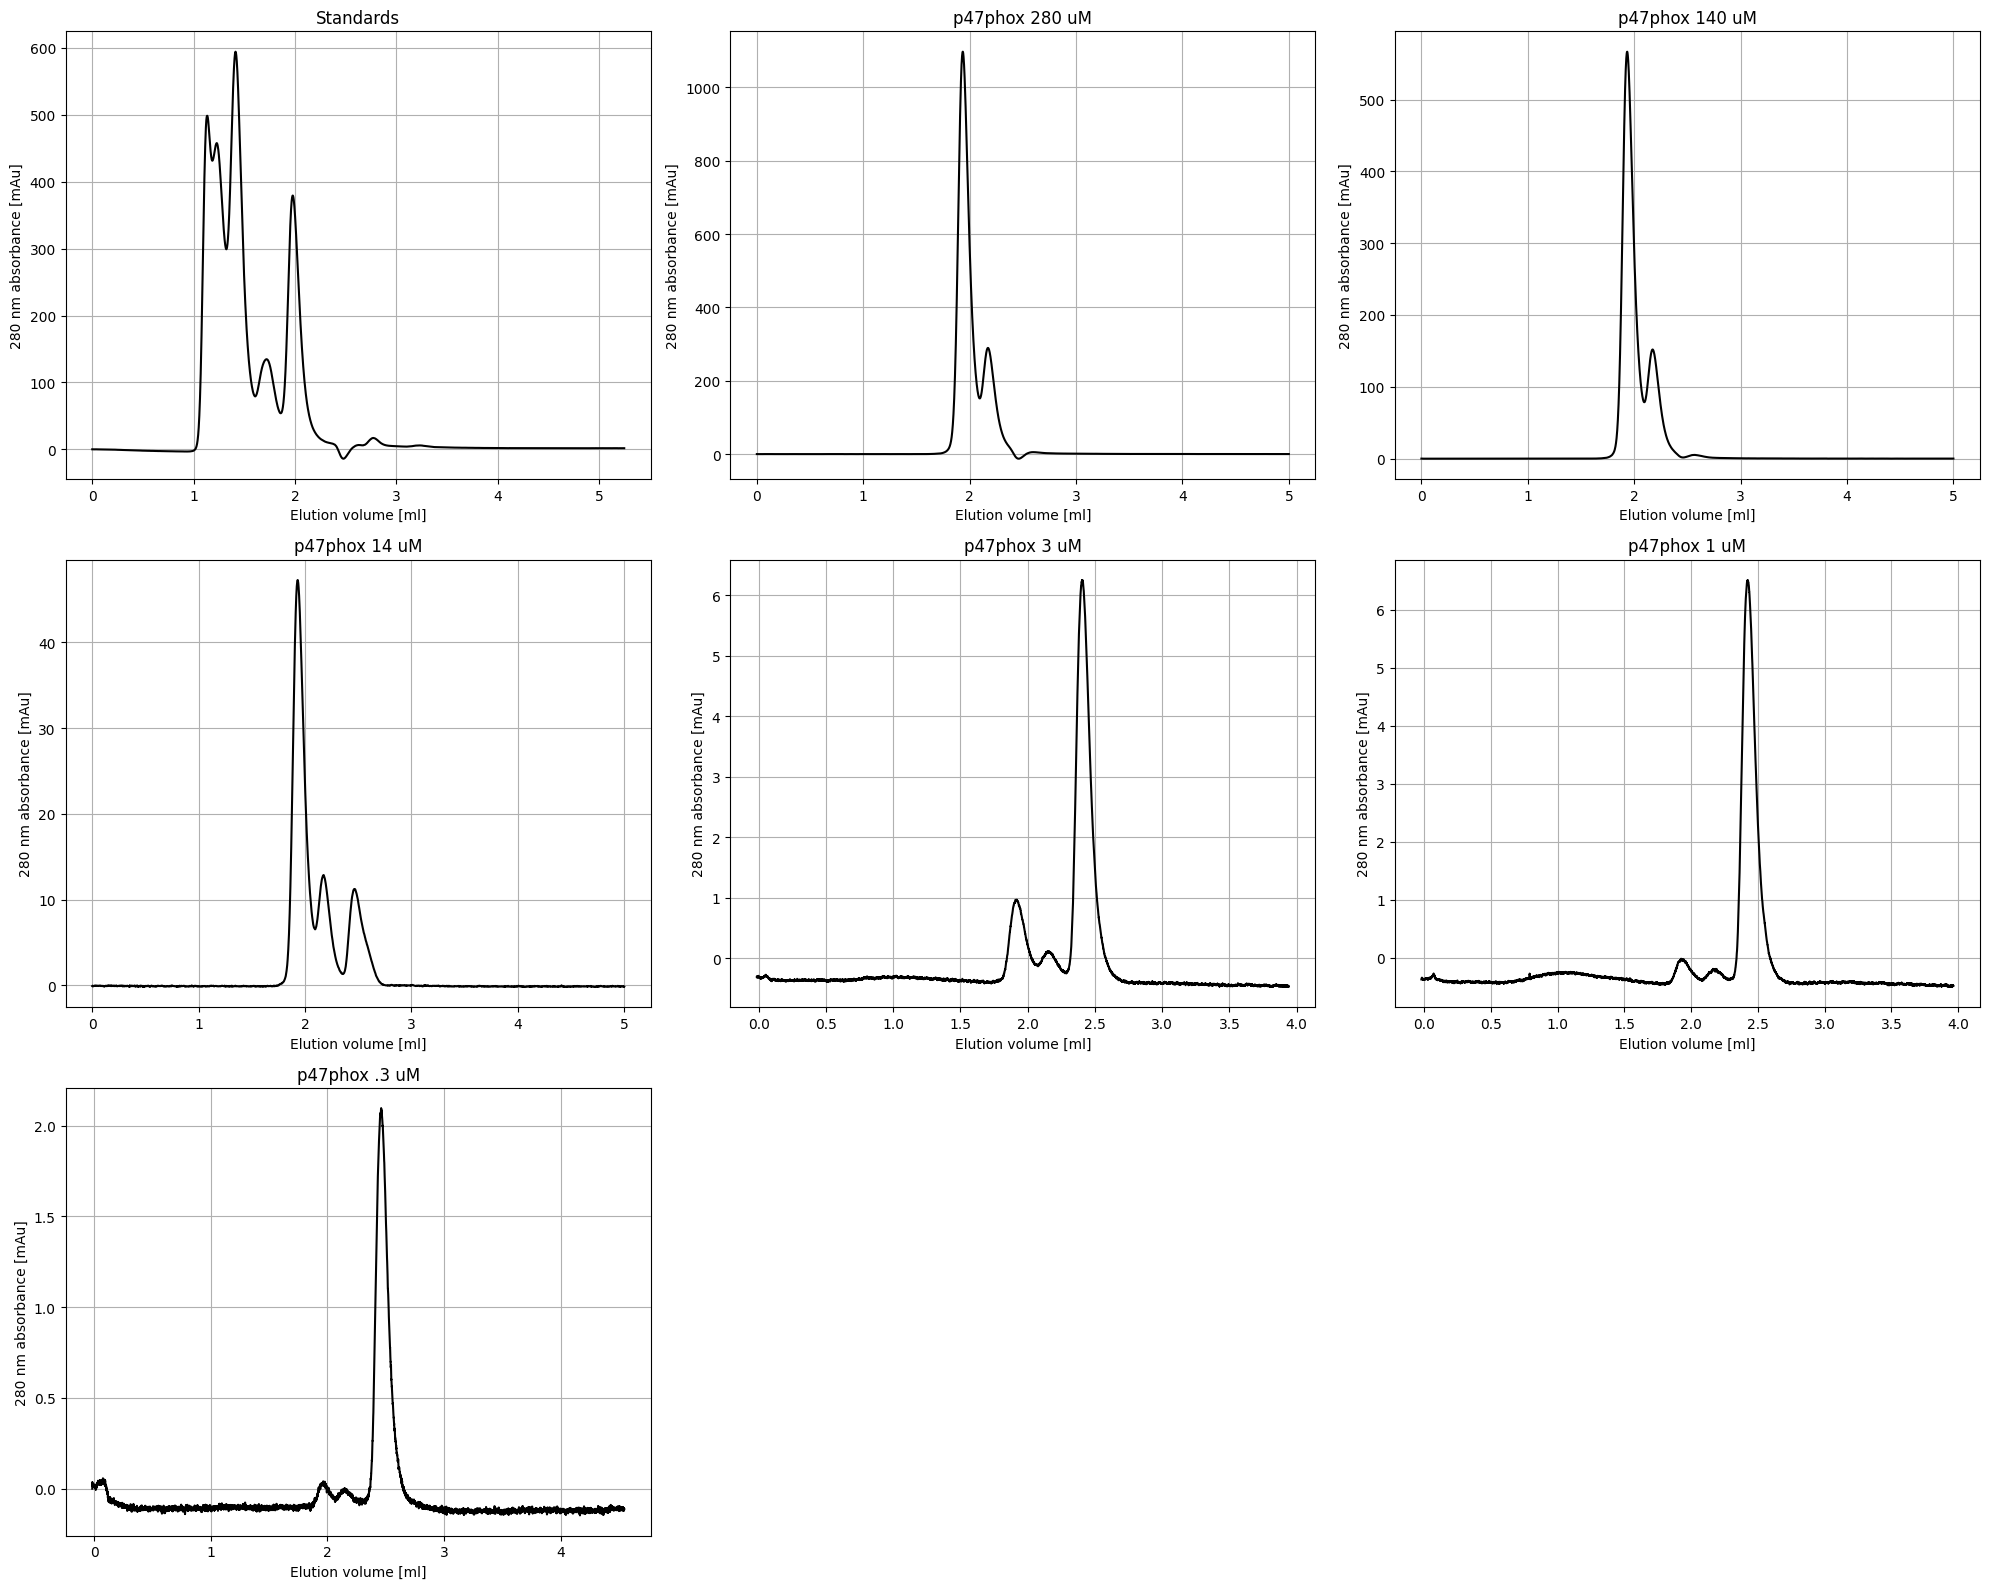

In [30]:
#plot all selected traces
from matplotlib.patches import Patch
import seaborn as sns
import math

# iterate through dictionary and plot

col_nums = 3  # how many plots per row
row_nums = math.ceil(len(selected_dict_df) / col_nums)  # how many rows of plots

plt.figure(figsize=(20, 16))  # change the figure size as needed

for i, (k, v) in enumerate(selected_dict_df.items(), 1):
    plt.subplot(row_nums, col_nums, i)
    p = sns.lineplot(data=v, x='Elution volume [ml]', y='280 nm absorbance [mAu]', color='black')
    plt.title(str(k))
    plt.grid(which='major')

plt.tight_layout()
plt.savefig('chromatograms.png')
plt.show()
